In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Defining training, validation and test sets
train_data_dir = 'Data/Train/' 
valid_data_dir = 'Data/Validation/'
test_data_dir = 'Data/Test/'

In [3]:
#Defining the image size, batch size and number of output classes.
h, w = 256, 256 
batch_size = 8 
n_classes = 8

# Convolution neural networks (CNN)

## Basic model
Preparation of input data

In [4]:
# Rescaling data to the range 0-1:
train_generator = ImageDataGenerator(rescale=1/255) 
valid_generator = ImageDataGenerator(rescale=1/255)
test_generator = ImageDataGenerator(rescale=1/255)
#Creating a transmission channel:
train_flow = train_generator.flow_from_directory(train_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size, 
                                                 class_mode="categorical") 
valid_flow = valid_generator.flow_from_directory(valid_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size,
                                                 class_mode="categorical") 
test_flow = test_generator.flow_from_directory(test_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size, 
                                                 class_mode="categorical",
                                                shuffle=False
                                              )

Found 2234 images belonging to 8 classes.
Found 240 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


We create a model using convolutional neural networks. We create two two-dimensional Conv2D layers with 128 neurons, a 3x3 filter size, and a "relu" activation function. Each convolutional layer is followed by 2x2 pooling and a dropout of 0.5.

The output consists of one Dense layer with 128 neurons, a "relu" activation function, followed by a dropout of 0.5, and a second Dense layer with the number of neurons equal to the number of classes and a "softmax" activation function.
The model is stopped using Early Stopping, taking into account categorical accuracy.
The model uses the Adam optimizer with a learning rate of 0.0001.

In [5]:
model_1= Sequential()
#In the first layer we enter input_shape - dimensions of the input data
model_1.add(Conv2D(128, (3,3), activation="relu", input_shape=[h, w, 3])) # activation function - "relu"
model_1.add(MaxPool2D(2,2)) #pooling 2x2
model_1.add(Dropout(0.5))
model_1.add(Conv2D(128, (3,3), activation="relu"))
model_1.add(MaxPool2D(2,2)) #pooling 2x2
model_1.add(Dropout(0.5))
model_1.add(Flatten()) #flattening the cube into a vector
model_1.add(Dense(128, activation="relu"))
model_1.add(Dropout(0.5))
model_1.add(Dense(n_classes, activation="softmax")) # for multi-class classification - softmax activation function

model_1.compile(loss="categorical_crossentropy", 
              optimizer=Adam(0.0001),
              metrics=["categorical_accuracy"]) 

# EarlyStopping - patience is accepted at 5, we set the "monitor" to val_categorical_accuracy
early_stopping = EarlyStopping(monitor="val_categorical_accuracy", 
                               patience=3, 
                               restore_best_weights=True)

history_1 = model_1.fit(train_flow, 
          epochs=100, 
          validation_data=valid_flow, 
          callbacks=[early_stopping])

Epoch 1/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 753s 3s/step - categorical_accuracy: 0.1331 - loss: 2.6498 - val_categorical_accuracy: 0.2333 - val_loss: 2.0757
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 737s 3s/step - categorical_accuracy: 0.1572 - loss: 2.0672 - val_categorical_accuracy: 0.2625 - val_loss: 2.0579
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 754s 3s/step - categorical_accuracy: 0.1808 - loss: 2.0361 - val_categorical_accuracy: 0.3292 - val_loss: 1.9889
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 733s 3s/step - categorical_accuracy: 0.2688 - loss: 1.9155 - val_categorical_accuracy: 0.4333 - val_loss: 1.7618
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 707s 3s/step - categorical_accuracy: 0.3993 - loss: 1.6593 - val_categorical_accuracy: 0.4792 - val_loss: 1.5752
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 688s 2s/step - categorical_accuracy: 0.5121 - loss: 1.3587 - val_categorical_accuracy: 0.5667 - val_loss: 1.3885
Epoch 7/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - categorical_accuracy

In [6]:
model_loss, model_accuracy = model_1.evaluate(test_flow)
print(f"Loss on the test set: {model_loss:.4f}")
print(f"Categorical accuracy on the test set: {model_accuracy:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 396ms/step - categorical_accuracy: 0.5928 - loss: 1.6986
Loss on the test set: 1.6846
Categorical accuracy on the test set: 0.5850


The graphs below show how loss and categorical accuracy changed over the epochs.

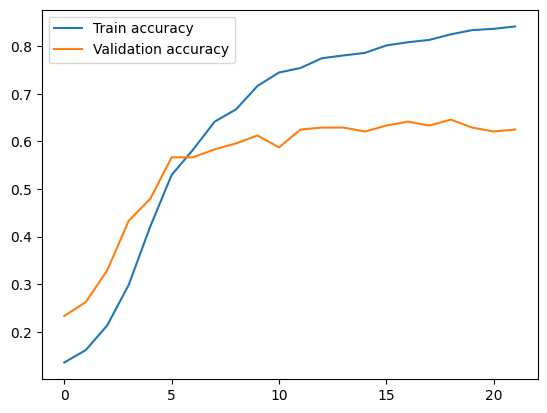

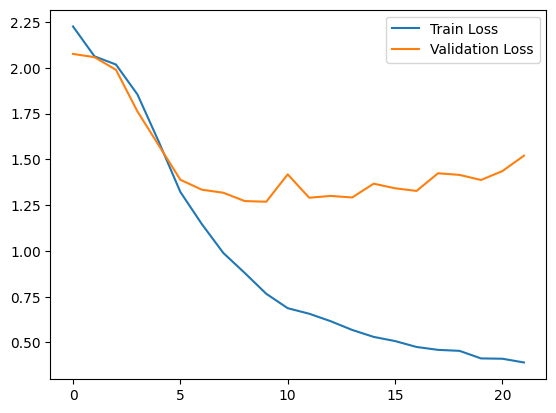

In [7]:
plt.plot(history_1.history['categorical_accuracy'], label ="Train accuracy")
plt.plot(history_1.history['val_categorical_accuracy'], label ="Validation accuracy")
plt.legend()
plt.show()
plt.figure()
plt.plot(history_1.history['loss'], label ="Train Loss")
plt.plot(history_1.history['val_loss'], label ="Validation Loss")
plt.legend()

The confusion matrix shows how many labels were classified correctly and how many incorrectly.

50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 343ms/step


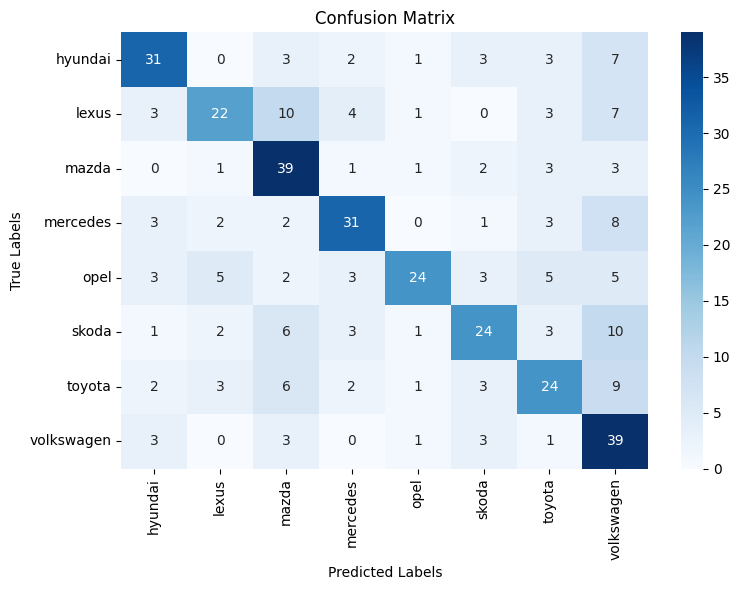

In [8]:
y_pred = np.argmax(model_1.predict(test_flow), axis=1)
y_test = test_flow.classes
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=test_flow.class_indices.keys(),
            yticklabels=test_flow.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Data Augmentation
To improve the model, we will use data augmentation, which means we will apply various transformations to the input images to diversify and enlarge the dataset. The ImageDataGenerator defines image rotation in the range of -15 to 15 degrees and a zoom range of 0.2.

In [9]:
train_generator = ImageDataGenerator(rescale=1/255, 
                                     rotation_range=15, 
                                     zoom_range=0.2)
valid_generator = ImageDataGenerator(rescale=1/255)
test_generator = ImageDataGenerator(rescale=1/255)

train_flow = train_generator.flow_from_directory(train_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size, 
                                                 class_mode="categorical") 
valid_flow = valid_generator.flow_from_directory(valid_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size,
                                                 class_mode="categorical") 
test_flow = test_generator.flow_from_directory(test_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size, 
                                                 class_mode="categorical",
                                                shuffle=False
                                              )

model_2= Sequential()
model_2.add(Conv2D(128, (3,3), activation="relu", input_shape=[h, w, 3])) 
model_2.add(MaxPool2D(2,2))
model_2.add(Dropout(0.5))
model_2.add(Conv2D(128, (3,3), activation="relu"))
model_2.add(MaxPool2D(2,2))
model_2.add(Dropout(0.5))
model_2.add(Flatten()) 
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(n_classes, activation="softmax"))

model_2.compile(loss="categorical_crossentropy",  
              optimizer=Adam(0.0001),
              metrics=["categorical_accuracy"])

early_stopping = EarlyStopping(monitor="val_categorical_accuracy",  
                               patience=7, 
                               restore_best_weights=True)

history_2 = model_2.fit(train_flow, 
          epochs=100, 
          validation_data=valid_flow, 
          callbacks=[early_stopping])

Found 2234 images belonging to 8 classes.
Found 240 images belonging to 8 classes.
Found 400 images belonging to 8 classes.
Epoch 1/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 712s 3s/step - categorical_accuracy: 0.1205 - loss: 2.6787 - val_categorical_accuracy: 0.1208 - val_loss: 2.0794
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 713s 3s/step - categorical_accuracy: 0.1410 - loss: 2.0787 - val_categorical_accuracy: 0.1625 - val_loss: 2.0777
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 744s 3s/step - categorical_accuracy: 0.1336 - loss: 2.0760 - val_categorical_accuracy: 0.1708 - val_loss: 2.0757
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 703s 3s/step - categorical_accuracy: 0.1521 - loss: 2.0697 - val_categorical_accuracy: 0.2292 - val_loss: 2.0565
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 725s 3s/step - categorical_accuracy: 0.1783 - loss: 2.0356 - val_categorical_accuracy: 0.2208 - val_loss: 1.9874
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 704s 3s/step - categorical_accuracy: 0.2072 - loss: 1.9803 - val_

In [10]:
model_loss, model_accuracy = model_2.evaluate(test_flow)
print(f"Loss on the test set: {model_loss:.4f}")
print(f"Categorical accuracy on the test set: {model_accuracy:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 398ms/step - categorical_accuracy: 0.6650 - loss: 1.2468
Loss on the test set: 1.2528
Categorical accuracy on the test set: 0.6475


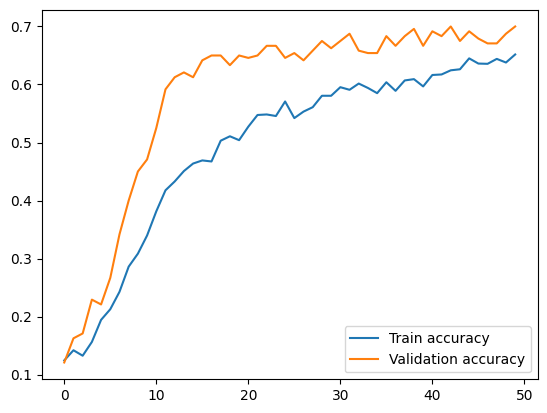

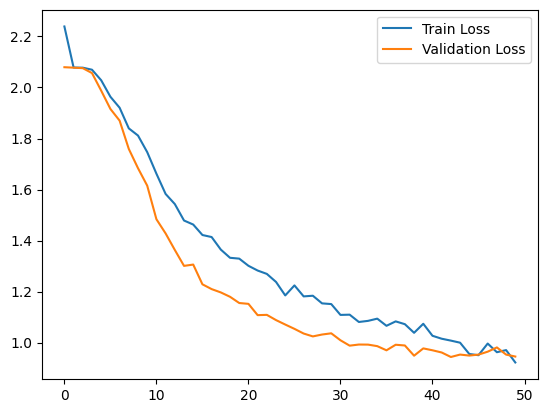

In [11]:
plt.plot(history_2.history['categorical_accuracy'], label ="Train accuracy")
plt.plot(history_2.history['val_categorical_accuracy'], label ="Validation accuracy")
plt.legend()
plt.show()
plt.figure()
plt.plot(history_2.history['loss'], label ="Train Loss")
plt.plot(history_2.history['val_loss'], label ="Validation Loss")
plt.legend()

50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step


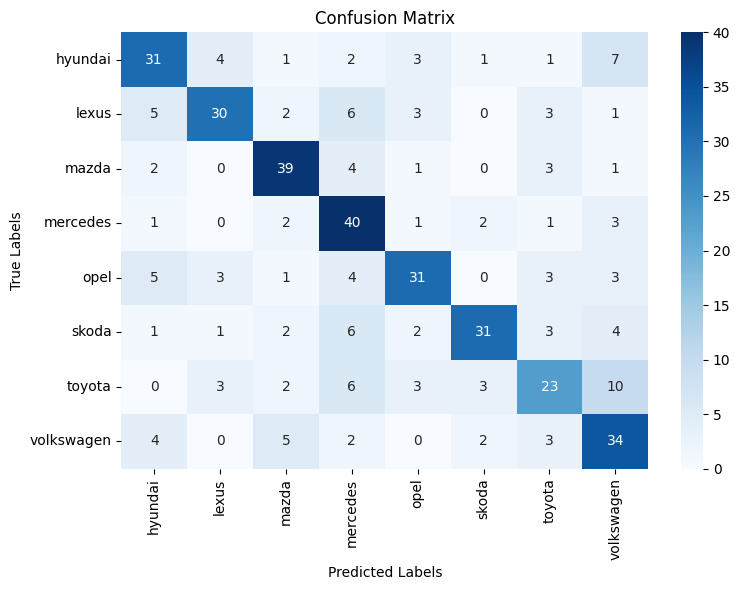

In [12]:
y_pred = np.argmax(model_2.predict(test_flow), axis=1)
y_test = test_flow.classes
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=test_flow.class_indices.keys(),
            yticklabels=test_flow.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Transfer learning

Using transfer learning, a model was built based on the VGG16 model from the Keras library. Two Danse layers were created as output, each with 1024 and 512 neurons, with the "relu" activation function, followed by a dropout of 0.5. Next, a Danse layer with the number of neurons equal to the number of classes and the "softmax" activation function was applied. The model is stopped using Early Stopping, taking into account categorical accuracy.
The Adam optimizer was used for the model with a learning rate of 0.0001.
The ImageDataGenerator was set to the same rotation and zoom parameters as the previous model.
The layers from the original VGG16 model are not trained.

In [13]:
base_model = VGG16(weights="imagenet", include_top=False,  input_shape=(h, w, 3))
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:])) 
top_model.add(Dense(1024, activation="relu"))
top_model.add(Dropout(0.5))
top_model.add(Dense(512, activation="relu"))
top_model.add(Dropout(0.5))
top_model.add(Dense(n_classes, activation="softmax"))

model_3 = Sequential()
model_3.add(base_model)
model_3.add(top_model)
model_3.layers[0].trainable = False
model_3.summary() 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 8)                   │      34,084,360 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,799,048 (186.15 MB)

 Trainable params: 34,084,360 (130.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
train_generator = ImageDataGenerator(rescale=1/255, 
                                     rotation_range=15, 
                                     zoom_range=0.2)
valid_generator = ImageDataGenerator(rescale=1/255)
test_generator = ImageDataGenerator(rescale=1/255)

train_flow = train_generator.flow_from_directory(train_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size, 
                                                 class_mode="categorical") 
valid_flow = valid_generator.flow_from_directory(valid_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size,
                                                 class_mode="categorical") 
test_flow = test_generator.flow_from_directory(test_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size, 
                                                 class_mode="categorical",
                                                shuffle=False
                                              )
early_stopping = EarlyStopping(monitor="val_categorical_accuracy", 
                               patience=5, 
                               restore_best_weights=True)

model_3.compile(loss="categorical_crossentropy", 
              optimizer=Adam(0.0001), 
              metrics=["categorical_accuracy"]) 

history_3 = model_3.fit(train_flow, 
          epochs=100, 
          validation_data=valid_flow, 
          callbacks=[early_stopping])

Found 2234 images belonging to 8 classes.
Found 240 images belonging to 8 classes.
Found 400 images belonging to 8 classes.
Epoch 1/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 904s 3s/step - categorical_accuracy: 0.2101 - loss: 2.4363 - val_categorical_accuracy: 0.6042 - val_loss: 1.3022
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 883s 3s/step - categorical_accuracy: 0.5059 - loss: 1.4192 - val_categorical_accuracy: 0.7208 - val_loss: 0.9135
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 893s 3s/step - categorical_accuracy: 0.6487 - loss: 1.0380 - val_categorical_accuracy: 0.7792 - val_loss: 0.7494
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 888s 3s/step - categorical_accuracy: 0.7081 - loss: 0.8695 - val_categorical_accuracy: 0.7667 - val_loss: 0.6754
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 918s 3s/step - categorical_accuracy: 0.7578 - loss: 0.7066 - val_categorical_accuracy: 0.7417 - val_loss: 0.7115
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 4094s 15s/step - categorical_accuracy: 0.7987 - loss: 0.5907 - va

In [16]:
model_loss, model_accuracy = model_3.evaluate(test_flow)
print(f"Loss on the test set: {model_loss:.4f}")
print(f"Categorical accuracy on the test set: {model_accuracy:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - categorical_accuracy: 0.8289 - loss: 0.6201
Loss on the test set: 0.6627
Categorical accuracy on the test set: 0.8175


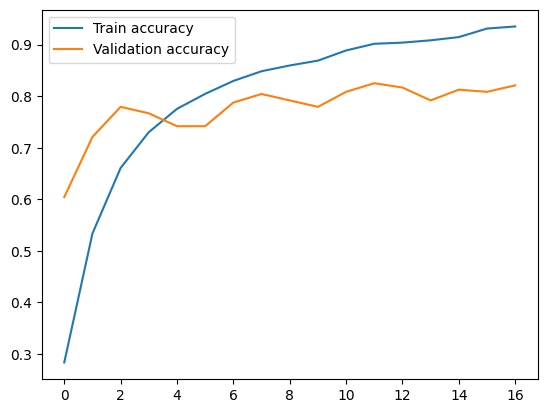

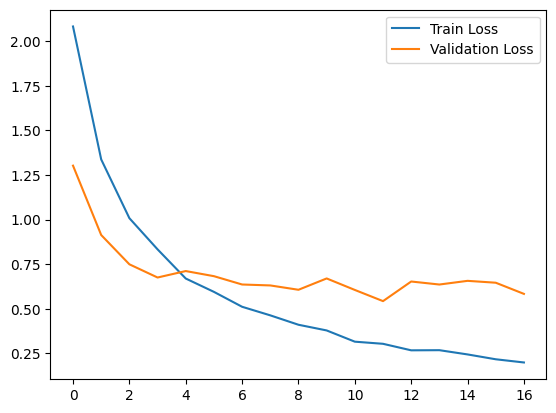

In [17]:
plt.plot(history_3.history['categorical_accuracy'], label ="Train accuracy")
plt.plot(history_3.history['val_categorical_accuracy'], label ="Validation accuracy")
plt.legend()
plt.show()
plt.figure()
plt.plot(history_3.history['loss'], label ="Train Loss")
plt.plot(history_3.history['val_loss'], label ="Validation Loss")
plt.legend()

50/50 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step


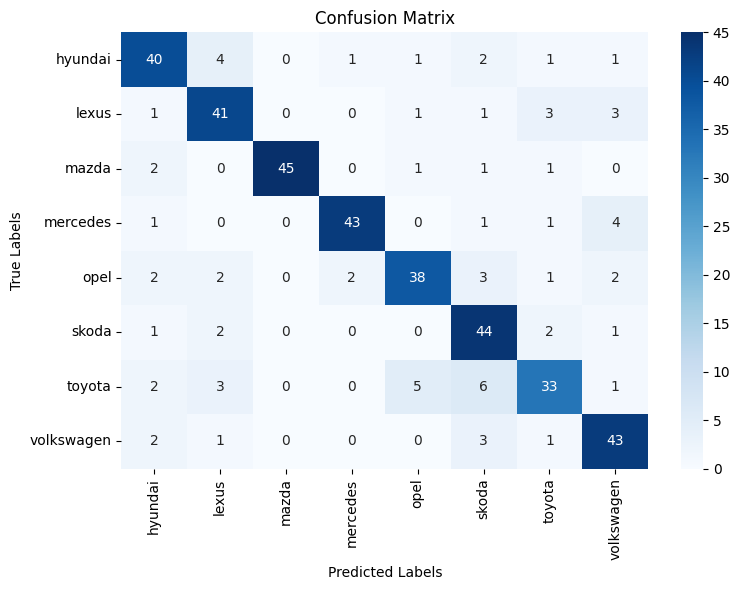

In [18]:
y_pred = np.argmax(model_3.predict(test_flow), axis=1)
y_test = test_flow.classes
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=test_flow.class_indices.keys(),
            yticklabels=test_flow.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Transfer learning with preprocess input 

In the next model, also based on the VGG16 model, the "preprocess_input" function was downloaded from the Keras library, which processes the input data in the same way as in the VGG16 trained model. The remaining model parameters are the same as in the previous model.

In [19]:
base_model = VGG16(weights="imagenet", include_top=False,  input_shape=(h, w, 3)) 
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(1024, activation="relu"))
top_model.add(Dropout(0.5))
top_model.add(Dense(512, activation="relu"))
top_model.add(Dropout(0.5))
top_model.add(Dense(n_classes, activation="softmax"))

model_4 = Sequential()
model_4.add(base_model)
model_4.add(top_model)
model_4.layers[0].trainable = False
model_4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 8)                   │      34,084,360 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,799,048 (186.15 MB)

 Trainable params: 34,084,360 (130.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input) 
valid_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_flow = train_generator.flow_from_directory(train_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size, 
                                                 class_mode="categorical") 
valid_flow = valid_generator.flow_from_directory(valid_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size,
                                                 class_mode="categorical") 
test_flow = test_generator.flow_from_directory(test_data_dir, 
                                                 target_size=(h, w), 
                                                 batch_size=batch_size, 
                                                 class_mode="categorical",
                                                shuffle=False
                                              )

early_stopping = EarlyStopping(monitor="val_categorical_accuracy",  #zmieniamy na val_accuracy
                               patience=5, 
                               restore_best_weights=True)

model_4.compile(loss="categorical_crossentropy", 
              optimizer=Adam(0.0001), 
              metrics=["categorical_accuracy"]) 

history_4 = model_4.fit(train_flow, 
          epochs=100, 
          validation_data=valid_flow, 
          callbacks=[early_stopping])

Found 2234 images belonging to 8 classes.
Found 240 images belonging to 8 classes.
Found 400 images belonging to 8 classes.
Epoch 1/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 741s 3s/step - categorical_accuracy: 0.3029 - loss: 17.3842 - val_categorical_accuracy: 0.7292 - val_loss: 2.3613
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 738s 3s/step - categorical_accuracy: 0.6194 - loss: 6.6966 - val_categorical_accuracy: 0.7542 - val_loss: 2.2062
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 742s 3s/step - categorical_accuracy: 0.7523 - loss: 3.8295 - val_categorical_accuracy: 0.8042 - val_loss: 2.0631
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 4934s 18s/step - categorical_accuracy: 0.7950 - loss: 3.3754 - val_categorical_accuracy: 0.8000 - val_loss: 1.7902
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 740s 3s/step - categorical_accuracy: 0.8088 - loss: 2.9991 - val_categorical_accuracy: 0.7583 - val_loss: 2.9554
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 739s 3s/step - categorical_accuracy: 0.8318 - loss: 2.8843 - v

In [21]:
model_loss, model_accuracy = model_4.evaluate(test_flow)
print(f"Loss on the test set: {model_loss:.4f}")
print(f"Categorical accuracy on the test set: {model_accuracy:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - categorical_accuracy: 0.8396 - loss: 2.8818
Loss on the test set: 3.8753
Categorical accuracy on the test set: 0.8075


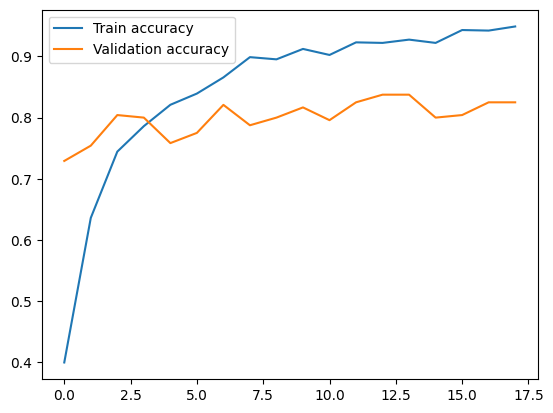

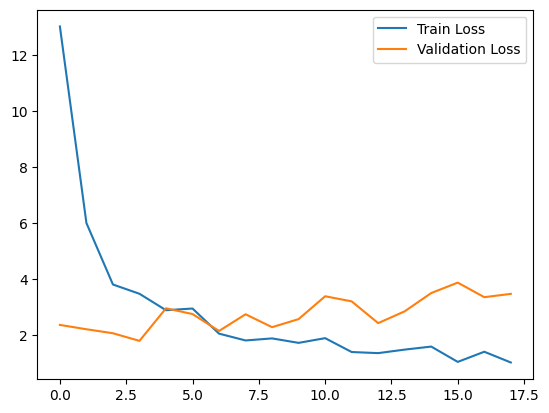

In [22]:
plt.plot(history_4.history['categorical_accuracy'], label ="Train accuracy")
plt.plot(history_4.history['val_categorical_accuracy'], label ="Validation accuracy")
plt.legend()
plt.show()
plt.figure()
plt.plot(history_4.history['loss'], label ="Train Loss")
plt.plot(history_4.history['val_loss'], label ="Validation Loss")
plt.legend()

50/50 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step


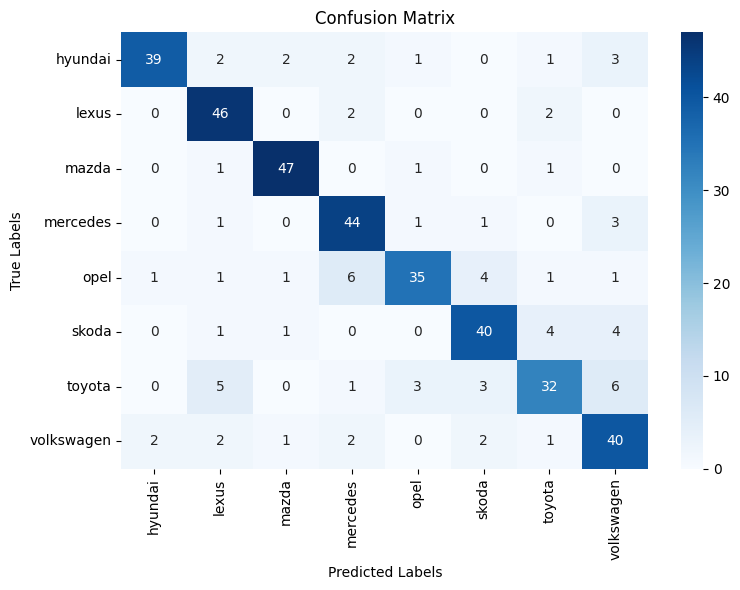

In [23]:
y_pred = np.argmax(model_4.predict(test_flow), axis=1)
y_test = test_flow.classes
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=test_flow.class_indices.keys(),
            yticklabels=test_flow.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Conclusions and summary
As can be seen, subsequent models demonstrate increasingly improved accuracy.

The first basic model has the worst results, with an accuracy of 0.5850.

The second model, which uses data augmentation, shows improvement, with an accuracy of 0.6475.

Only the use of the existing VGG16 model, the result of the work of many scientists, shows significantly better accuracy.
The model with input data preprocessed through data augmentation shows slightly better accuracy (accuracy 0.8175) than the model with input data processed in the same way as the original VGG16 trained model (accuracy 0.8075).

It is therefore clear that using the existing VGG16 model and properly adjusting the input data through augmentation yields the best results.